# 2022 COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme (PLEASE DO NOT RUN ANY CODE IN SECTION 4)
PLEASE DO NOT RUN any code in section 4 since some of the graphs/tables were made automatically from train/test trails. Running any code in section 4 may result in loss of table/graph.
Thank you 

The object oriented programming codes section was not used, just simply running all codes before section 4 would do the work.

In section 4.1, I found that only using glove-twitter-100 embedding produced the best weighted F1 score. Therefore, in section 1 through 3 and section 5, I used only one embedding model. However, embedding concatenation was used in section 4.1 to determine the accuracies of different word embedding.

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.0. Data Collection [DO NOT MODIFY THIS]

In [2]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less and our views tend to align more.|||The two ESTPs I have gotten the chance to know seem to experience much more than other people who have been on the planet for the same amount of time and are quite the renaissance (wo)men.  Is this...|||I don't really have a best friend ISTP(passion-amateur group co-founder), INTJ(intellectual and various sma

In [3]:
# Preview of the data in the csv file, which has two columns: 
# (1)type - label of the post (2)posts - the corresponding post content
training_data.head()

,type,posts
0,F,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,T,'I'm finding the lack of me in these posts ver...
2,T,'Good one _____ https://www.youtube.com/wat...
3,T,"'Dear INTP, I enjoyed our conversation the o..."
4,T,'You're fired.|||That's another silly misconce...


In [4]:
# Extract the labels and posts and store into List
# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()
# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()

## 1.1. URL Removal
*related to the section 4.2*

In [5]:
import re
training_posts_no_url, testing_posts_no_url = [], []
for i in training_posts:
    result = re.sub(r"http\S+", "", i)
    training_posts_no_url.append(result)
for j in testing_posts:
    result = re.sub(r"http\S+", "", j)
    testing_posts_no_url.append(result)
print(testing_posts_no_url[1])

' does, indeed, help. To answer the question, my IQ is 129, and it was professionally administered. But, it doesn't mean anything to me--I don't need a number to tell me I'm intelligent, I...|||Shall I play you a song on the world's smallest violin?|||I really don't get how you guys think she's an introvert. She's said many times about how extroverted she is, and she was voted Most Talkative by her high school. I can see an introvert being...|||Assuming morality is absolute, can you explain to me the absolute best moral choice out of every situation? I'm assuming you cannot, and on who's authority should we accept these truths? It cannot be...|||Hello all,  I originally joined this site in late 2009, and I lurked for many months before. I had just turned 19 and started college , in search of myself, and I used this forum to help discover...|||1. Log in after a week or so of not being on here. 2. Look at INFJ forum, sees that all the new threads are already ones that I've seen and discu

## 1.2. Preprocess data (e.g. Stop words, Stemming)
*related to the section 4.2*

In [6]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words('english')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

import numpy as np
from sklearn.preprocessing import LabelEncoder

def remove_number(x):
    x =  re.sub(r'[0-9]+', '', x)
    return x
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]', '', x)
    return x
def pre_process(input_list):
    # Converting to lower case
    lower = [s.lower() for s in input_list]
    # Removing number 
    remove_num = [remove_number(s) for s in lower]
    # Removing punctuation
    remove_pun = [remove_punctuation_re(s) for s in remove_num]
    # Tokenization 
    Tokenized = [word_tokenize(s) for s in remove_pun]
    # Removing stop words
    remove_sw = []
    for tokens in Tokenized:
        filtered_sentence = [w for w in tokens if not w in stop_words]
        remove_sw.append(filtered_sentence)
    # Stemming
    result = []
    for tokens in remove_sw:
        stemmed = [stemmer.stem(s) for s in tokens]
        result.append(stemmed)
    # Lemmatization
    #result = []
    #for tokens in result_1:
    #    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    #    result.append(lemma_sentence)
    return result
# Label Encoding
unique_labels = np.unique(training_labels)
lEnc = LabelEncoder()
training_labels_encoded = lEnc.fit_transform(training_labels)
testing_labels_encoded = lEnc.transform(testing_labels)
n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['F' 'T']
[0 1]


In [7]:
training_posts_no_url_processed = pre_process(training_posts_no_url)
testing_posts_no_url_processed = pre_process(testing_posts_no_url)



---



# 2 - Input Representation


## 2.1. Word Embedding Construction
*related to the section 4.1 and 4.3*


In [8]:
print(len(training_posts_no_url_processed))
print(len(testing_posts_no_url_processed))
emb_list = []
for i in training_posts_no_url_processed:
    emb_list.append(i)
for j in testing_posts_no_url_processed:
    emb_list.append(j)
print(len(emb_list))

7808
867
8675


In [9]:
# Training Embedding model 1
from gensim.models import Word2Vec
word_emb_model_1 = Word2Vec(emb_list, size=100, window=5, min_count=0, workers=-1, sg=1)

## 2.2. Pretrained Word Embedding
*related to the section 4.3*

In [10]:
# Download Embedding model from gensim
import gensim.downloader as api
word_emb_model_2 = api.load("glove-twitter-100")

## 2.3. Input Concatenation
*related to the section 4.3*

In [11]:
def concat(word_emb_model_1, word_emb_model_2):
    emb_dim = word_emb_model_1.vector_size + word_emb_model_2.vector_size
    emb_table = []
    for i, word in enumerate(word_list):
        if word in word_emb_model_1 and word in word_emb_model_2:
            emb_table.append(np.concatenate((word_emb_model_1[word], word_emb_model_2[word]),0))
        elif word in word_emb_model_1 and word not in word_emb_model_2:
            emb_table.append(np.concatenate((word_emb_model_1[word], [0]*word_emb_model_2.vector_size),0))
        elif word in word_emb_model_1 and word not in word_emb_model_2:
            emb_table.append(np.concatenate(([0]*word_emb_model_1.vector_size, word_emb_model_2[word]),0))
        else:
            emb_table.append([0]*emb_dim)
    emb_table = np.array(emb_table)
    return emb_table, emb_dim

In [12]:
word_set = set() 
for sent in emb_list:
    for word in sent:
        word_set.add(word)

word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list.sort()
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

import numpy as np

emb_dim = word_emb_model_2.vector_size
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model_2:
        emb_table.append(word_emb_model_2[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
    
# Padding & Encoding
seq_length = 100
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded[:100])
    return sent_encoded

train_pad_encoded_no_url = encode_and_add_padding(training_posts_no_url_processed, seq_length, word_index )
test_pad_encoded_no_url = encode_and_add_padding(testing_posts_no_url_processed, seq_length, word_index )

# 3 - Model Implementation

### 3.1. Build Sequence Model (Bi-directional model)
*related to the section 4.4*

In [13]:
vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.001

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        n_hidden = 50
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


### 3.2. Train Sequence Model (Bi-directional model)

*related to the section 4.4*

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [14]:
input_torch = torch.from_numpy(np.array(train_pad_encoded_no_url)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)

for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')
torch.save(model, '/content/bi_LSTM.pt')

Epoch: 10, loss: 0.68408, train_acc: 0.55
Epoch: 20, loss: 0.67492, train_acc: 0.58
Epoch: 30, loss: 0.66023, train_acc: 0.61
Epoch: 40, loss: 0.62605, train_acc: 0.64
Epoch: 50, loss: 0.60115, train_acc: 0.67
Epoch: 60, loss: 0.58173, train_acc: 0.69
Epoch: 70, loss: 0.56929, train_acc: 0.70
Epoch: 80, loss: 0.55278, train_acc: 0.72
Epoch: 90, loss: 0.54061, train_acc: 0.73
Epoch: 100, loss: 0.52580, train_acc: 0.74
Finished Training


# 4 - Evaluation


## 4.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)




In [ ]:
!git clone https://github.com/stanfordnlp/GloVe.git
import numpy as np
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""
    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]
    split_size = 100
    correct_sem = 0; 
    correct_syn = 0;
    correct_tot = 0
    count_sem = 0; 
    count_syn = 0; 
    count_tot = 0 
    full_count = 0 
    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]
        if len(data) == 0:
            continue
        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T
        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))
            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])
            dist = np.dot(W, pred_vec.T)
            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf
            predictions[subset] = np.argmax(dist, 0).flatten()
        val = (ind4 == predictions) 
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

def emb_eva(directory):
    with open(directory, 'r') as f:
      vectors = {}
      for line in f.readlines()[1:]:
        vals = line.rstrip().split(' ')
        vectors[vals[0]] = [float(x) for x in vals[1:]]
    vocab_words=list(vectors.keys())
    vocab_size = len(vocab_words)
    vocab = {w: idx for idx, w in enumerate(vocab_words)}
    ivocab = {idx: w for idx, w in enumerate(vocab_words)}
    vector_dim = len(vectors[ivocab[0]])
    W = np.zeros((vocab_size, vector_dim))
    for word, v in vectors.items():
        if word == '<unk>':
            continue
        W[vocab[word], :] = v
    W_norm = np.zeros(W.shape)
    d = (np.sum(W ** 2, 1) ** (0.5))
    W_norm = (W.T / d).T
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
    sem_acc = (100 * correct_sem / float(count_sem))
    syn_acc = (100 * correct_syn / float(count_syn))
    total_acc = (100 * correct_tot / float(count_tot))
    return (sem_acc, syn_acc, total_acc)

Cloning into 'GloVe'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 606 (delta 5), reused 7 (delta 2), pack-reused 592
Receiving objects: 100% (606/606), 224.91 KiB | 1.80 MiB/s, done.
Resolving deltas: 100% (343/343), done.


In [ ]:
from gensim.models import Word2Vec
from gensim.models import FastText

dimension = [20, 50, 100, 200, 400]
window_size = [5, 10, 20]
sem_dim, syn_dim, total_dim = [], [], []
sem_win, syn_win, total_win = [], [], []
for i in dimension:
    print("Word2Vec Skip Gram size {} & window size 5".format(i))
    model = Word2Vec(training_posts_no_url_processed + testing_posts_no_url_processed,
                         size=i, window=5, min_count=5, workers=2, sg=1)
    
    model.wv.save_word2vec_format("/content/w2v_"+str(i)+"_5.txt", 
                                  binary = False)
    sem_acc, syn_acc, total_acc = emb_eva("/content/w2v_"+str(i)+"_5.txt")
    print(sem_acc, syn_acc, total_acc)
    sem_dim.append(sem_acc)
    syn_dim.append(syn_acc)
    total_dim.append(total_acc)


for j in window_size:
    print("Word2Vec Skip Gram size 100 & window size {}".format(j))
    model = Word2Vec(training_posts_no_url_processed + testing_posts_no_url_processed,
                         size=100, window=j, min_count=5, workers=2, sg=1)
    model.wv.save_word2vec_format("/content/w2v_100_"+str(j)+".txt", 
                                  binary = False)
    sem_acc, syn_acc, total_acc = emb_eva("/content/w2v_100_"+str(j)+".txt")
    print(sem_acc, syn_acc, total_acc)
    sem_win.append(sem_acc)
    syn_win.append(syn_acc)
    total_win.append(total_acc)


Word2Vec Skip Gram size 20 & window size 5
15.210355987055015 7.432762836185819 8.453695836873408
Word2Vec Skip Gram size 50 & window size 5
23.948220064724918 14.572127139364303 15.802888700084962
Word2Vec Skip Gram size 100 & window size 5
24.271844660194176 17.066014669926652 18.011894647408667
Word2Vec Skip Gram size 200 & window size 5
24.919093851132686 18.141809290953546 19.03143585386576
Word2Vec Skip Gram size 400 & window size 5
22.653721682847895 17.750611246943766 18.394222599830076
Word2Vec Skip Gram size 100 & window size 5
25.566343042071196 18.82640586797066 19.711129991503824
Word2Vec Skip Gram size 100 & window size 10
25.24271844660194 12.51833740831296 14.188615123194563
Word2Vec Skip Gram size 100 & window size 20
23.948220064724918 7.970660146699267 10.067969413763807


In [ ]:
from tabulate import tabulate
print("Accuracy vs Dimension")
mydata = [
          ["Fast Text Skip Gram", "20", "5", 
           "{:.2f}%".format(sem_dim[0]), "{:.2f}%".format(syn_dim[0]), 
           "{:.2f}%".format(total_dim[0])
           ],
          ["Fast Text Skip Gram", "50", "5", 
           "{:.2f}%".format(sem_dim[1]), "{:.2f}%".format(syn_dim[1]), 
           "{:.2f}%".format(total_dim[1])
           ],
          ["Fast Text Skip Gram", "100", "5", 
           "{:.2f}%".format(sem_dim[2]), "{:.2f}%".format(syn_dim[2]), 
           "{:.2f}%".format(total_dim[2])
           ],
          ["Fast Text Skip Gram", "200", "10", 
           "{:.2f}%".format(sem_dim[3]), "{:.2f}%".format(syn_dim[3]), 
           "{:.2f}%".format(total_dim[3])
           ],
          ["Fast Text Skip Gram", "400", "10", 
           "{:.2f}%".format(sem_dim[4]), "{:.2f}%".format(syn_dim[4]), 
           "{:.2f}%".format(total_dim[4])
           ]
]
head = ["Model", "Dimension", "Window size", "Sem.", "Syn.", "Total"]
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
print("")
print("==" * 40)
print("")
print("Accuracy vs Window size")
mydata_win = [
          ["Fast Text Skip Gram", "100", "5", 
           "{:.2f}%".format(sem_win[0]), "{:.2f}%".format(syn_win[0]), 
           "{:.2f}%".format(total_win[0])
           ],
          ["Fast Text Skip Gram", "100", "10", 
           "{:.2f}%".format(sem_win[1]), "{:.2f}%".format(syn_win[1]), 
           "{:.2f}%".format(total_win[1])
           ],
          ["Fast Text Skip Gram", "100", "20", 
           "{:.2f}%".format(sem_win[2]), "{:.2f}%".format(syn_win[2]), 
           "{:.2f}%".format(total_win[2])
           ]
]
head = ["Model", "Dimension", "Window size", "Sem.", "Syn.", "Total"]
# display table
print(tabulate(mydata_win, headers=head, tablefmt="grid"))

Accuracy vs Dimension
+---------------------+-------------+---------------+--------+--------+---------+
| Model               |   Dimension |   Window size | Sem.   | Syn.   | Total   |
+=====================+=============+===============+========+========+=========+
| Fast Text Skip Gram |          20 |             5 | 15.21% | 7.43%  | 8.45%   |
+---------------------+-------------+---------------+--------+--------+---------+
| Fast Text Skip Gram |          50 |             5 | 23.95% | 14.57% | 15.80%  |
+---------------------+-------------+---------------+--------+--------+---------+
| Fast Text Skip Gram |         100 |             5 | 24.27% | 17.07% | 18.01%  |
+---------------------+-------------+---------------+--------+--------+---------+
| Fast Text Skip Gram |         200 |            10 | 24.92% | 18.14% | 19.03%  |
+---------------------+-------------+---------------+--------+--------+---------+
| Fast Text Skip Gram |         400 |            10 | 22.65% | 17.75% | 18.3

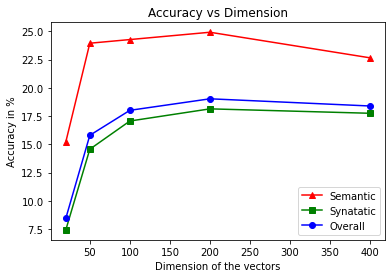

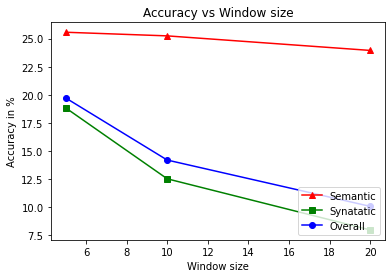

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xpoints = np.array([20, 50, 100, 200, 400])
y_sem = np.array(sem_dim)
y_syn = np.array(syn_dim)
y_total = np.array(total_dim)
plt.plot(xpoints, y_sem, color = 'r', label = "Semantic", marker = "^")
plt.plot(xpoints, y_syn, color = 'g', label = "Synatatic", marker = "s")
plt.plot(xpoints, y_total, color = 'blue', label = "Overall", marker = "o")
plt.legend(loc="lower right")
plt.title("Accuracy vs Dimension")
plt.xlabel('Dimension of the vectors') 
plt.ylabel('Accuracy in %') 
plt.show()

xpoints = 5, 10, 20
y_sem = np.array(sem_win)
y_syn = np.array(syn_win)
y_total = np.array(total_win)
plt.plot(xpoints, y_sem, color = 'r', label = "Semantic", marker = "^")
plt.plot(xpoints, y_syn, color = 'g', label = "Synatatic", marker = "s")
plt.plot(xpoints, y_total, color = 'blue', label = "Overall", marker = "o")
plt.legend(loc="lower right")
plt.title("Accuracy vs Window size")
plt.xlabel('Window size') 
plt.ylabel('Accuracy in %') 
plt.show()


As shown in the figures. In terms of the dimension of embeddings vectors, the accuracies increased rapidly from size 0 to 100. The larger the vector dimension, the more aspects of the words can be expressed, therefore higher the accuracies. While with dimension sizes larger than 100, the accuracy improvements were demolished. Which was the problem Mikolov and his team faced, which they solved by increasing the size of training data while increasing the vector dimension (Mikolov et al., 2013). Explanations for this problem might be that some features may carry false information when training with large dimension sizes. The small size of the training data might also contribute since some words in the test set had not appeared in the training set.<br>
In terms of window size, larger window size led to lower accuracies. According to Levy and Goldberg, one of the explanations could be that a larger window size would lead the word embedding to be more topic-related (Levy & Goldberg, 2014). Meaning that the embedding trained with a larger window size would result in an embedding that is more MBTI related. Yet, the topics were not significantly MBTI-related for the test set. They were more about the words themselves, which caused embedding trained with larger window sizes to result in lower accuracies. 
1.   Mikolov, T., Chen, K., Corrado, G., &amp; Dean, J. (2013). Efficient estimation of word representations in vector space. 
2.   Levy, O., &amp; Goldberg, Y. (2014). Dependency-based word embeddings. Proceedings of the 52nd Annual Meeting of the Association for Computational Linguistics (Volume 2: Short Papers). https://doi.org/10.3115/v1/p14-2050 



## 4.2. Performance Evaluation with Data Processing Techiques


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)



In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load("/content/bi_LSTM.pt")
input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       467
           1       0.59      0.61      0.60       400

    accuracy                           0.62       867
   macro avg       0.62      0.62      0.62       867
weighted avg       0.62      0.62      0.62       867



In [ ]:
training_posts_processed = pre_process(training_posts)
testing_posts_processed = pre_process(testing_posts)
print(len(training_posts_processed))
print(len(testing_posts_processed))
emb_list = []
for i in training_posts_processed:
    emb_list.append(i)
for j in testing_posts_processed:
    emb_list.append(j)
print(len(emb_list))
from gensim.models import FastText
word_emb_model_1_with_url = FastText(emb_list, size=200, window=5, min_count=0, workers=-1, sg=1)
word_set = set() 
for sent in emb_list:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')
word_list = list(word_set) 
word_list = list(word_set) 
word_list.sort()
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
import numpy as np
emb_dim = word_emb_model_1_with_url.vector_size + word_emb_model_2.vector_size
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model_1_with_url and word in word_emb_model_2:
        emb_table.append(np.concatenate((word_emb_model_1_with_url[word], word_emb_model_2[word]),0))
    elif word in word_emb_model_1_with_url and word not in word_emb_model_2:
        emb_table.append(np.concatenate((word_emb_model_1_with_url[word], [0]*word_emb_model_2.vector_size),0))
    elif word in word_emb_model_1_with_url and word not in word_emb_model_2:
        emb_table.append(np.concatenate(([0]*word_emb_model_1_with_url.vector_size, word_emb_model_2[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# Padding & Encoding
seq_length = 100
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded[:100])
    return sent_encoded

train_pad_encoded = encode_and_add_padding(training_posts_processed, seq_length, word_index )
test_pad_encoded= encode_and_add_padding(testing_posts_processed, seq_length, word_index )

In [ ]:
input_torch = torch.from_numpy(np.array(train_pad_encoded)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)
for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')
torch.save(model, '/content/bi_LSTM_with_url.pt')

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM with url
model_without_url= torch.load('/content/bi_LSTM_with_url.pt')
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))

In [ ]:
'''import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words('english')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

import numpy as np
from sklearn.preprocessing import LabelEncoder

def remove_number(x):
    x =  re.sub(r'[0-9]+', '', x)
    return x
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]', '', x)
    return x
def pre_process_2(input_list):
    # Converting to lower case
    lower = [s.lower() for s in input_list]
    # Removing number 
    remove_num = [remove_number(s) for s in lower]
    # Removing punctuation
    remove_pun = [remove_punctuation_re(s) for s in remove_num]
    # Tokenization 
    Tokenized = [word_tokenize(s) for s in remove_pun]
    # Removing stop words
    #for tokens in Tokenized:
    #    filtered_sentence = [w for w in tokens if not w in stop_words]
    #    remove_sw.append(filtered_sentence)
    # Stemming
    result_1 = []
    for tokens in Tokenized:
        stemmed = [stemmer.stem(s) for s in tokens]
        result_1.append(stemmed)
    # Lemmatization
    result = []
    for tokens in result_1:
        lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
        result.append(lemma_sentence)
    return result

training_posts_no_url_no_sw_processed = pre_process_2(training_posts_no_url)
testing_posts_no_url_no_sw_processed = pre_process_2(testing_posts_no_url)'''

In [ ]:
'''emb_list = []
for i in training_posts_no_url_no_sw_processed:
    emb_list.append(i)
for j in testing_posts_no_url_no_sw_processed:
    emb_list.append(j)
print(len(emb_list))
from gensim.models import FastText
word_emb_model_1_with_url = FastText(emb_list, size=200, window=5, min_count=0, workers=-1, sg=1)

word_set = set() 
for sent in emb_list:
    for word in sent:
        word_set.add(word)

word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list = list(word_set) 
word_list.sort()

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

import numpy as np
emb_dim = word_emb_model_1_with_url.vector_size + word_emb_model_2.vector_size
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model_1_with_url and word in word_emb_model_2:
        emb_table.append(np.concatenate((word_emb_model_1_with_url[word], word_emb_model_2[word]),0))
    elif word in word_emb_model_1_with_url and word not in word_emb_model_2:
        emb_table.append(np.concatenate((word_emb_model_1_with_url[word], [0]*word_emb_model_2.vector_size),0))
    elif word in word_emb_model_1_with_url and word not in word_emb_model_2:
        emb_table.append(np.concatenate(([0]*word_emb_model_1_with_url.vector_size, word_emb_model_2[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

# Padding & Encoding
seq_length = 100
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded[:100])
    return sent_encoded

train_pad_encoded = encode_and_add_padding(training_posts_no_url_no_sw_processed, seq_length, word_index )
test_pad_encoded = encode_and_add_padding(testing_posts_no_url_no_sw_processed, seq_length, word_index )'''

In [ ]:
'''unique_labels = np.unique(training_labels)
lEnc = LabelEncoder()
training_labels_encoded = lEnc.fit_transform(training_labels)
testing_labels_encoded = lEnc.transform(testing_labels)
n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))'''

In [ ]:
'''print(type(train_pad_encoded))
import torch
input_torch = torch.from_numpy(np.array(train_pad_encoded)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)


for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_without_url_without_sw_removal.pt')'''

In [ ]:
'''import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM with url
model_without_url_wo_sw_removal = torch.load(
    '/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_without_url_without_sw_removal.pt')
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
outputs = model_without_url_wo_sw_removal(input_torch) 
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))'''


In [ ]:
'''import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words('english')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

import numpy as np
from sklearn.preprocessing import LabelEncoder

def remove_number(x):
    x =  re.sub(r'[0-9]+', '', x)
    return x
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]', '', x)
    return x
def pre_process_3(input_list):
    # Converting to lower case
    lower = [s.lower() for s in input_list]
    # Removing number 
    remove_num = [remove_number(s) for s in lower]
    # Removing punctuation
    remove_pun = [remove_punctuation_re(s) for s in remove_num]
    # Tokenization 
    Tokenized = [word_tokenize(s) for s in remove_pun]
    # Removing stop words
    #for tokens in Tokenized:
    #    filtered_sentence = [w for w in tokens if not w in stop_words]
    #    remove_sw.append(filtered_sentence)
    # Stemming
    result = []
    for tokens in Tokenized:
        stemmed = [stemmer.stem(s) for s in tokens]
        result.append(stemmed)
    # Lemmatization
    #result = []
    #for tokens in result_1:
    #    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    #    result.append(lemma_sentence)
    return result

training_posts_no_url_no_sw_processed = pre_process_3(training_posts_no_url)
testing_posts_no_url_no_sw_processed = pre_process_3(testing_posts_no_url)'''

In [ ]:
'''emb_list = []
for i in training_posts_no_url_no_sw_processed:
    emb_list.append(i)
for j in testing_posts_no_url_no_sw_processed:
    emb_list.append(j)
print(len(emb_list))
from gensim.models import FastText
word_emb_model_1_with_url = FastText(emb_list, size=200, window=5, min_count=0, workers=-1, sg=1)

word_set = set() 
for sent in emb_list:
    for word in sent:
        word_set.add(word)

word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list = list(word_set) 
word_list.sort()

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

import numpy as np
emb_dim = word_emb_model_1_with_url.vector_size + word_emb_model_2.vector_size
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model_1_with_url and word in word_emb_model_2:
        emb_table.append(np.concatenate((word_emb_model_1_with_url[word], word_emb_model_2[word]),0))
    elif word in word_emb_model_1_with_url and word not in word_emb_model_2:
        emb_table.append(np.concatenate((word_emb_model_1_with_url[word], [0]*word_emb_model_2.vector_size),0))
    elif word in word_emb_model_1_with_url and word not in word_emb_model_2:
        emb_table.append(np.concatenate(([0]*word_emb_model_1_with_url.vector_size, word_emb_model_2[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

# Padding & Encoding
seq_length = 100
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded[:100])
    return sent_encoded

train_pad_encoded = encode_and_add_padding(training_posts_no_url_no_sw_processed, seq_length, word_index )
test_pad_encoded = encode_and_add_padding(testing_posts_no_url_no_sw_processed, seq_length, word_index )'''

In [ ]:
'''unique_labels = np.unique(training_labels)
lEnc = LabelEncoder()
training_labels_encoded = lEnc.fit_transform(training_labels)
testing_labels_encoded = lEnc.transform(testing_labels)
n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))'''

In [ ]:
'''print(type(train_pad_encoded))
import torch
input_torch = torch.from_numpy(np.array(train_pad_encoded)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)


for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_without_url_without_sw_removal_without_lemma.pt')'''

In [ ]:
'''import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM with url
model_without_url_wo_sw_removal = torch.load(
    '/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_without_url_without_sw_removal_without_lemma.pt')
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
outputs = model_without_url_wo_sw_removal(input_torch) 
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))'''


In [ ]:
from tabulate import tabulate
print("Performance Evaluation with different Data Pre-processing Techniques (w/wo URL)")
mydata = [
          ["Bi-LSTM with URL", 0.55
           ],
          ["Bi-LSTM without URL", 0.57
           ]  
]
head = ["Model", "Weighted Average F1-Score"]
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
print("Please note that for evaluating performance with/withour URL, all other pre-process techniques were kept identical")
print("")
print("==" * 40)
print("")
print("Performance Evaluation with different Data Pre-processing Techniques (w/wo Lemmatization)")
mydata_2 = [
          ["Bi-LSTM with Lemmatization", 0.54
           ],
          ["Bi-LSTM without Lemmatization", 0.55
           ]  
]
head = ["Model", "Weighted Average F1-Score"]
# display table
print(tabulate(mydata_2, headers=head, tablefmt="grid"))

Performance Evaluation with different Data Pre-processing Techniques (w/wo URL)
+---------------------+-----------------------------+
| Model               |   Weighted Average F1-Score |
+=====================+=============================+
| Bi-LSTM with URL    |                        0.55 |
+---------------------+-----------------------------+
| Bi-LSTM without URL |                        0.57 |
+---------------------+-----------------------------+
Please note that for evaluating performance with/withour URL, all other pre-process techniques were kept identical


Performance Evaluation with different Data Pre-processing Techniques (w/wo Lemmatization)
+-------------------------------+-----------------------------+
| Model                         |   Weighted Average F1-Score |
+===============================+=============================+
| Bi-LSTM with Lemmatization    |                        0.54 |
+-------------------------------+-----------------------------+
| Bi-LSTM witho

As shown in the above table, with other pre-processing techniques remaining unchanged, removing URLs from the input data would improve the model performance. While keeping all pre-processing techniques unchanged, using lemmatization to pre-process the data would surprisingly lower the model performance. <br>
URLs are links to a webpage, and the URLs are usually long, yet they mostly do not contain any helpful information. Moreover, most URLs contain random combinations of numbers and letters, which have no physical meanings. Therefore, removing URLs would not lose much valuable information and will likely improve the model performance since some useless noises (random combinations of letters and numbers in URLs) are removed at the same time .<br>
Lemmatization was a method that converts a given word back to its original state. For example, after lemmatization, the word "is" or the word "are" would be output as "be" which was their original state. However, the above table shows that the model trained with not lemmatized input data had slightly better performance. The reason for that might be the poorly designed pre-processing stage. A lemmatization stage follows the stemming stage. Stemming and lemmatization are two very similar pre-processing techniques. This means that there is no significant difference between the data going through only the stemming stage and the data going through both stemming and lemmatization. And that would lead to the trained model having similar performance  

## 4.3. Performance Evaluation with Different Input


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

In [ ]:
print(len(training_posts_no_url_processed))
print(len(testing_posts_no_url_processed))
emb_list = []
for i in training_posts_no_url_processed:
    emb_list.append(i)
for j in testing_posts_no_url_processed:
    emb_list.append(j)
print(len(emb_list))
word_set = set() 
for sent in emb_list:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')
word_list = list(word_set) 
word_list.sort()
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

In [ ]:
import numpy as np
# 1 embedding model
def concat_1_model(word_emb_model_1):
    emb_dim = word_emb_model_1.vector_size
    emb_table = []
    for i, word in enumerate(word_list):
        if word in word_emb_model_1:
            emb_table.append(word_emb_model_1[word])
        else:
            emb_table.append([0]*emb_dim)
    emb_table = np.array(emb_table)
    return emb_table, emb_dim
# 2 embedding models
def concat(word_emb_model_1, word_emb_model_2):
    emb_dim = word_emb_model_1.vector_size + word_emb_model_2.vector_size
    emb_table = []
    for i, word in enumerate(word_list):
        if word in word_emb_model_1 and word in word_emb_model_2:
            emb_table.append(np.concatenate((word_emb_model_1[word], word_emb_model_2[word]),0))
        elif word in word_emb_model_1 and word not in word_emb_model_2:
            emb_table.append(np.concatenate((word_emb_model_1[word], [0]*word_emb_model_2.vector_size),0))
        elif word in word_emb_model_1 and word not in word_emb_model_2:
            emb_table.append(np.concatenate(([0]*word_emb_model_1.vector_size, word_emb_model_2[word]),0))
        else:
            emb_table.append([0]*emb_dim)
    emb_table = np.array(emb_table)
    return emb_table, emb_dim

# Padding & Encoding
seq_length = 100
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded[:100])
    return sent_encoded

In [ ]:
# Trining model W2V Skip Gram
from gensim.models import Word2Vec
word_emb_model_ft_sg = Word2Vec(emb_list, size=200, window=5, min_count=0, workers=-1, sg=1)
# Training model W2V CBOW
word_emb_model_ft_cbow = Word2Vec(emb_list, size=200, window=5, min_count=0, workers=-1, sg=0)
# Pretraind 1 "glove-wiki-gigaword-100"
import gensim.downloader as api
word_emb_model_pre_1 = api.load("glove-wiki-gigaword-100")
# Pretrained 2 "glove-twitter-100"
word_emb_model_pre_2 = api.load("glove-twitter-100")

In [ ]:
train_pad_encoded_no_url = encode_and_add_padding(training_posts_no_url_processed, seq_length, word_index )
test_pad_encoded_no_url = encode_and_add_padding(testing_posts_no_url_processed, seq_length, word_index )

In [ ]:
# W2V SG
emb_table, emb_dim = concat_1_model(word_emb_model_ft_sg)

vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.01
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        n_hidden = 50
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)
    def forward(self, x):
        x = self.emb(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
input_torch = torch.from_numpy(np.array(train_pad_encoded_no_url)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)
for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')
torch.save(model, 
           '/content/bi_LSTM_w2v_sg.pt')

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load(
    '/content/bi_LSTM_w2v_sg.pt'
    )
input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)
from sklearn.metrics import classification_report
print("W2V SG")
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))

In [ ]:
'''# W2V CBOW
emb_table, emb_dim = concat_1_model(word_emb_model_ft_cbow)

vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.01
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        n_hidden = 50
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)
    def forward(self, x):
        x = self.emb(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
input_torch = torch.from_numpy(np.array(train_pad_encoded_no_url)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)
for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')
torch.save(model, 
           '/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_w2v_cbow.pt')'''

In [ ]:
'''# Pretraind 1 "glove-wiki-gigaword-100"
emb_table, emb_dim = concat_1_model(word_emb_model_pre_1)

vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.01
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        n_hidden = 50
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)
    def forward(self, x):
        x = self.emb(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
input_torch = torch.from_numpy(np.array(train_pad_encoded_no_url)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)
for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')
torch.save(model, 
           '/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_wiki.pt')'''

In [ ]:
'''# Pretrained 2 "glove-twitter-100"
emb_table, emb_dim = concat_1_model(word_emb_model_pre_2)

vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.01
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        n_hidden = 50
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)
    def forward(self, x):
        x = self.emb(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
input_torch = torch.from_numpy(np.array(train_pad_encoded_no_url)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)
for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')
torch.save(model, 
           '/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_twitter.pt')'''

In [ ]:
'''# W2V SG + wiki
emb_table, emb_dim = concat(word_emb_model_ft_sg, word_emb_model_pre_1)

vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.01
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        n_hidden = 50
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)
    def forward(self, x):
        x = self.emb(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
input_torch = torch.from_numpy(np.array(train_pad_encoded_no_url)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)
for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')
torch.save(model, 
           '/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_sg+wiki.pt')'''

In [ ]:
'''# W2V SG + twi
emb_table, emb_dim = concat(word_emb_model_ft_sg, word_emb_model_pre_2)

vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.01
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        n_hidden = 50
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)
    def forward(self, x):
        x = self.emb(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
input_torch = torch.from_numpy(np.array(train_pad_encoded_no_url)).to(device)
target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)
for epoch in range(total_epoch):      
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')
torch.save(model, 
           '/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_sg+twi.pt')'''

In [ ]:
'''# W2V SG
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load(
    "/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_w2v_sg.pt"
    )
input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)
from sklearn.metrics import classification_report
print("W2V SG")
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))
# W2V CBOW
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load(
    "/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_w2v_cbow.pt"
    )
input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)
from sklearn.metrics import classification_report
print("W2V CBOW")
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))
# Pretrain wiki
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load(
    "/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_w2v_cbow.pt"
    )
input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)
from sklearn.metrics import classification_report
print("Pretrain WIKI")
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))
# Pretrain twitter
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load(
    "/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_twitter.pt"
    )
input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)
from sklearn.metrics import classification_report
print("Pretrain TWI")
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))
# W2V SG + wiki
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load(
    "/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_sg+wiki.pt"
    )
input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)
from sklearn.metrics import classification_report
print("W2V SG + WIKI")
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))
# W2V SG + twi
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load(
    "/content/drive/MyDrive/Colab Notebooks/5046 assignment 1/bi_LSTM_sg+twi.pt"
    )
input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)
from sklearn.metrics import classification_report
print("W2V SG + TWI")
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))'''

In [ ]:
from tabulate import tabulate
print("Performance Evaluation with different input")
mydata = [
          ["Word2Vec Skip-Gram", 0.43
           ],
          ["Word2Vec CBOW", 0.50
           ],
          ["Pretrianed glove-wiki-gigaword-100", 0.50
           ],
          ["Pretrianed glove-twitter-100", 0.61
           ],
          ["Word2Vec Skip-Gram + glove-wiki-gigaword-100", 0.57
           ],
          ["Word2Vec Skip-Gram + glove-twitter-100", 0.59
           ],
]
head = ["Model", "Weighted Average F1-Score"]
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

Performance Evaluation with different input
+----------------------------------------------+-----------------------------+
| Model                                        |   Weighted Average F1-Score |
+==============================================+=============================+
| Word2Vec Skip-Gram                           |                        0.43 |
+----------------------------------------------+-----------------------------+
| Word2Vec CBOW                                |                        0.5  |
+----------------------------------------------+-----------------------------+
| Pretrianed glove-wiki-gigaword-100           |                        0.5  |
+----------------------------------------------+-----------------------------+
| Pretrianed glove-twitter-100                 |                        0.61 |
+----------------------------------------------+-----------------------------+
| Word2Vec Skip-Gram + glove-wiki-gigaword-100 |                        0.57 |
+-------

The above table shows that the best-performing model was trained with only glove-twitter word embeddings. The lowest was trained using the w2v skip-gram embedding model. <br>
By comparing the input with skip-gram and the CBOW word embeddings, the model trained with only CBOW had better performance. According to Mikolov and his team, CBOW could better represent frequently appearing words (Mikolov et al., 2013). Therefore, one explanation for this might be that in the training set, many words had frequently appeared throughout the data set, causing the CBOW model to out-perform the SG model. <br>
By comparing the concatenation input and the single-embedding input, it was apparent that using concatenation input would be better than using a MBTI-trained w2v input. The reason for this would be the size of the data set. Most likely, the pre-trained models were trained on large size corpus, leading the word embedding models to be more accurate. On the other hand, by comparing the concatenation input and the single pre-trained input, the single pre-trained input out-performed the concatenation word embedding input. This might be because the low accuracy of MBTI-trained embedding essentially worsened the performance. 
<br>
The Twitter-pre-trained model had the best performance might be that the text in the MBTI data set was more oral oriented, meaning that the text was less formal, which was closer to text on Twitter than text on Wiki. Therefore, the model trained with the Twitter-pre-trained model achieved the best performance. 

## 4.4. Performance Evaluation with Different Sequence Models


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

In [ ]:
embedded_docs_train = []
maxlength = 100
for doc in training_posts_no_url_processed:
    embedded_doc = []
    for i in range(maxlength):
        if i == len(doc):
            for j in range(maxlength-i):
                embedded_doc.append([0]*100)
            break
        else:
            try:
                embedded_doc.append(word_emb_model_2.wv[doc[i]])
            except:
                embedded_doc.append([0]*100)
    embedded_docs_train.append(embedded_doc)

embedded_docs_test = []
maxlength = 100
for doc in testing_posts_no_url_processed:
    embedded_doc = []
    for i in range(maxlength):
        if i == len(doc):
            for j in range(maxlength-i):
                embedded_doc.append([0]*100)
            break
        else:
            try:
                embedded_doc.append(word_emb_model_2.wv[doc[i]])
            except:
                embedded_doc.append([0]*100)
    embedded_docs_test.append(embedded_doc)'''

In [ ]:
embedded_docs_train = np.array(embedded_docs_train)
print(embedded_docs_train.shape)
embedded_docs_test = np.array(embedded_docs_test)
print(embedded_docs_test.shape)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Bi_RNN_Model(nn.Module):
    def __init__(self):
        super(Bi_RNN_Model, self).__init__()
        # set the bidirectional to True
        self.rnn = nn.RNN(n_input, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(2*n_hidden,n_class)

    def forward(self, x):        
        x, h_n = self.rnn(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        output = self.linear(hidden_out)
        return output


In [ ]:
import numpy as np
import torch.optim as optim

#training_labels_encoded = lEnc.fit_transform(training_labels)
#testing_labels_encoded = lEnc.transform(testing_labels)

seq_length = embedded_docs_train.shape[1]
n_input = embedded_docs_train.shape[2]
n_class = np.unique(training_labels_encoded).shape[0]

# Set the hyperparameters 
n_hidden = 50
batch_size = 256
total_epoch = 100
learning_rate = 0.03

In [ ]:
from sklearn.metrics import accuracy_score
# Initialize model, set up the loss calculator and optimizer
model = Bi_RNN_Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(total_epoch):
    train_loss = 0
    for ind in range(0,embedded_docs_train.shape[0],batch_size):
        input_batch = embedded_docs_train[ind:min(ind+batch_size, embedded_docs_train.shape[0])]
        target_batch = training_labels_encoded[ind:min(ind+batch_size, embedded_docs_train.shape[0])]
        input_batch_torch = torch.from_numpy(input_batch).float().to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)

        model.train()
        optimizer.zero_grad()
        outputs = model(input_batch_torch) 
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer.step()
    if epoch%10 == 9:
        train_loss += loss.item()
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())
        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')
torch.save(model, 
           '/content/bi_RNN.pt')

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load(
     '/content/bi_LSTM.pt'
    )
input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
outputs = model_without_url(input_torch) 
predicted = torch.argmax(outputs, -1)
from sklearn.metrics import classification_report
print("bi-LSTM")
print(classification_report(testing_labels_encoded,predicted.cpu().numpy()))

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load model bi-LSTM without url
model_without_url= torch.load(
     '/content/bi_RNN.pt'
    )
model_without_url.eval()
outputs = model_without_url(torch.from_numpy(embedded_docs_test).float().to(device)) 
predicted = torch.argmax(outputs, 1)
from sklearn.metrics import classification_report
print("bi-RNN")
print(classification_report(testing_labels_encoded, predicted.cpu().numpy(),digits=4))

In [ ]:
from tabulate import tabulate
print("Performance Evaluation with different sequence models")
mydata = [
          ["bi-LSTM", 0.62
           ],
          ["bi- RNN", 0.49
           ]
]
head = ["Model", "Weighted Average F1-Score"]
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

Performance Evaluation with different sequence models
+---------+-----------------------------+
| Model   |   Weighted Average F1-Score |
+=========+=============================+
| bi-LSTM |                        0.62 |
+---------+-----------------------------+
| bi- RNN |                        0.49 |
+---------+-----------------------------+


By comparing the model between LSTM and RNN, it was evident that the LSTM model had a significantly better performance than the RNN model.<br>
In terms of RNN, one of its drawbacks is that RNN is not capable of handling long-term dependencies, such that it can only consider hidden states from its previous cell. To solve this problem, LSTM was invented. LSTM is a variant of RNN, for which LSTM is designed to store information over extended time intervals with backpropagation (Hochreiter & Schmidhuber, 1997). With that being said, LSTM can store information
 much longer than comparing to RNN. Therefore, in this section, when training with relatively long sentences, LSTM was able to take many words into account. In contrast, RNN can only take its previous word into account, leading to the LSTM model outperforming the RNN model.

## 4.5. HyperParameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)



In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score


learning = [0.1, 0.01, 0.001]
result = []
for i in learning:
    epoch = [1, 5,  10, 50, 100, 200, 500]
    epoch_f1 = []
    for j in epoch:
        print("Training with epoch {} and learning rate {}".format(j, i))
        vocab_size = len(word_list)
        total_epoch = j
        learning_rate = i

        model = Model().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        input_torch = torch.from_numpy(np.array(train_pad_encoded_no_url)).to(device)
        target_torch = torch.from_numpy(np.array(training_labels_encoded)).view(-1).to(device)

        for epoch in range(total_epoch):
            model.train()
            optimizer.zero_grad()
            outputs = model(input_torch) 
            loss = criterion(outputs, target_torch)
            loss.backward()
            optimizer.step()

        print('Finished Training')
        input_torch = torch.from_numpy(np.array(test_pad_encoded_no_url)).to(device)
        outputs = model(input_torch) 
        predicted = torch.argmax(outputs, -1)
        from sklearn.metrics import f1_score
        f1 = f1_score(testing_labels_encoded,predicted.cpu().numpy(), average='weighted')
        print(f1)
        epoch_f1.append(f1)
    result.append(epoch_f1)

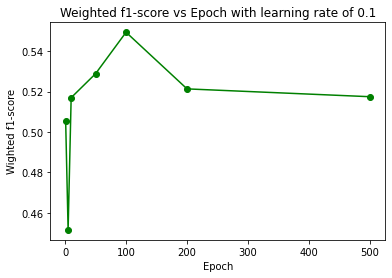

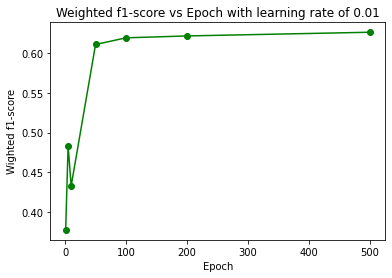

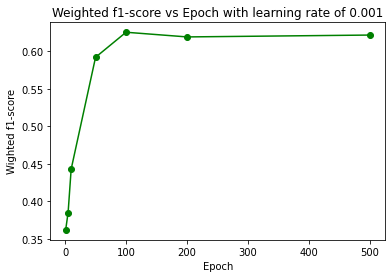

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xpoints = np.array([1, 5,  10, 50, 100, 200, 500])
plt.plot(xpoints, result[0], color = 'green', label = "Overall", marker = "o")
plt.title("Weighted f1-score vs Epoch with learning rate of {}".format(learning[0]))
plt.xlabel('Epoch') 
plt.ylabel('Wighted f1-score') 
plt.show()

xpoints = np.array([1, 5,  10, 50, 100, 200, 500])
plt.plot(xpoints, result[1], color = 'green', label = "Overall", marker = "o")
plt.title("Weighted f1-score vs Epoch with learning rate of {}".format(learning[1]))
plt.xlabel('Epoch') 
plt.ylabel('Wighted f1-score') 
plt.show()

xpoints = np.array([1, 5,  10, 50, 100, 200, 500])
plt.plot(xpoints, result[2], color = 'green', label = "Overall", marker = "o")
plt.title("Weighted f1-score vs Epoch with learning rate of {}".format(learning[2]))
plt.xlabel('Epoch') 
plt.ylabel('Wighted f1-score') 
plt.show()'''

As shown in the plots above, it was obvious that the model would be in its peak performance when using 100 epochs to train the model. The final learning rate adopted for sections 1 through 3 was 0.001.<br>
The reason for choosing 100 epochs was that 100 was the optimal number that the trained model was not overfitting and had the best performance. With more epochs, the model might overfit, which would lead to worse performance and might take longer to train. <br>
The reason for choosing 0.001 as the learning rate was that when learning rates were 0.1 and 0.01, the performance did improve faster with a larger amount of epochs (steeper slope). However, when using a small number of epochs, the models v overshot the minimal. 

#5 - Test your model via Colab Form Fields User Interface

You are required to design a user interface so that user can input a textual sentence via the colab form fields user interface to get the personality type classification result from your trained model. *You can just modify based on the following Colab Form Fields template*

In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

training_posts=training_data['posts'].tolist()
training_labels=training_data['type'].tolist()
testing_posts=testing_data['posts'].tolist()
testing_labels=testing_data['type'].tolist()

import re
training_posts_no_url, testing_posts_no_url = [], []
for i in training_posts:
    result = re.sub(r"http\S+", "", i)
    training_posts_no_url.append(result)
for j in testing_posts:
    result = re.sub(r"http\S+", "", j)
    testing_posts_no_url.append(result)
print(testing_posts_no_url[:5])

import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words('english')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

import numpy as np
from sklearn.preprocessing import LabelEncoder

def remove_number(x):
    x =  re.sub(r'[0-9]+', '', x)
    return x
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]', '', x)
    return x
def pre_process(input_list):
    # Converting to lower case
    lower = [s.lower() for s in input_list]
    # Removing number 
    remove_num = [remove_number(s) for s in lower]
    # Removing punctuation
    remove_pun = [remove_punctuation_re(s) for s in remove_num]
    # Tokenization 
    Tokenized = [word_tokenize(s) for s in remove_pun]
    # Removing stop words
    remove_sw = []
    for tokens in Tokenized:
        filtered_sentence = [w for w in tokens if not w in stop_words]
        remove_sw.append(filtered_sentence)
    # Stemming
    result = []
    for tokens in remove_sw:
        stemmed = [stemmer.stem(s) for s in tokens]
        result.append(stemmed)
    return result

unique_labels = np.unique(training_labels)
lEnc = LabelEncoder()
training_labels_encoded = lEnc.fit_transform(training_labels)
testing_labels_encoded = lEnc.transform(testing_labels)
n_class = len(unique_labels)


training_posts_no_url_processed = pre_process(training_posts_no_url)
testing_posts_no_url_processed = pre_process(testing_posts_no_url)

emb_list = []
for i in training_posts_no_url_processed:
    emb_list.append(i)
for j in testing_posts_no_url_processed:
    emb_list.append(j)

# Download Embedding model from gensim
import gensim.downloader as api
word_emb_model_2 = api.load("glove-twitter-100")

word_set = set() 
for sent in emb_list:
    for word in sent:
        word_set.add(word)

word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list.sort()
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

import numpy as np

emb_dim = word_emb_model_2.vector_size
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model_2:
        emb_table.append(word_emb_model_2[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
    
# Padding & Encoding
seq_length = 100
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded[:100])
    return sent_encoded

train_pad_encoded_no_url = encode_and_add_padding(training_posts_no_url_processed, seq_length, word_index )
test_pad_encoded_no_url = encode_and_add_padding(testing_posts_no_url_processed, seq_length, word_index )

vocab_size = len(word_list)
total_epoch = 100
learning_rate = 0.001

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        n_hidden = 50
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#@title Personality Type Prediction
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '1PgbZlcjAvMIRcqLvq5jOqyCmpDmF_ZLf'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bi_LSTM.pt') 
text = "" #@param {type:"string"}
text = re.sub(r"http\S+", "", text)
text = pre_process([text])
text_input = encode_and_add_padding(
    text, 
    seq_length, 
    word_index)
model = torch.load(
     '/content/bi_LSTM.pt'
    )
input_torch = torch.from_numpy(
    np.array(text_input)).to(device)
outputs = model(input_torch) 
predicted = torch.argmax(outputs, -1)
output = "T" if predicted.cpu().numpy()[0] == 1 else "F"
print("Predicted Personality Type: {}".format(output))

["'Actually, from these results, it looks like you're triple-withdrawn: 5w4, 9w8, 4w5.  It would appear that you just happen to have strong 2, 6, and 7 traits.|||It's odd that you're associating the whole heart triad with narcissism.  Also, I would associate Fives with having some antisocial disorder, not Eights (BTW let's set aside the aspergers and call it...|||So is my mom.  It sometimes annoys me to pieces:  My mom: Go do *insert known, to-do task here* Me: I know My mom: Well, if you know, then why don't you go do it?  ...yeah, I'm not one...|||I'm gonna guess the EJ types are most likely to groupthink, but I'm not entirely sure.  Thoughts?  Also, which types are least likely to groupthink?|||Very true.  My guess is that 9s are the most idealized type (thanks to our high levels of neutrality and inner tranquility), but from the perspective of a 9, it isn't worth it to idealize any type. ...|||I hardly ever wear hats, if at all.  Nice new avatar BTW, dealwithit.|||The ENTJ I'm curr

# Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 